<img src="http://www.redttu.edu.co/es/wp-content/uploads/2016/01/itm.png" alt="drawing" width="400"/>

<hr>

Pedro Atencio - 2019

__Agenda__:

- Numpy
    - Inicializacion de arreglos y acceso.
        - Shape.
        - Zeros, Ones, linspace, arange.
    - Slicing.
    - Funciones básicas y axis.
        - sum, mean, std, linalg.norm, random.
        - hsplit, vsplit.
        - python math vs numpy.
            - Ejemplo: funcion sigmoide.
    - Funciones de la clase nd-array (built-in) vs funciones de numpy.
    - Vectorization / Broadcasting
        - sumatorias y multiplicación de vectores.
        - Ejemplo: distancia euclidea.
        
- IO en Archivos

 <hr>
 # 1. Inicializacion de arreglos y acceso.

In [1]:
import numpy
import numpy as np

In [2]:
A = np.array([[1],[2],[3]]) #creamos un arreglo manualmente. 
print("Tamanio del arreglo: ",A.shape) #imprimimos su tamanio
print("Tipo de dato (clase) del arreglo: ", type(A))
print("Num fils: ", A.shape[0])
print("Num cols: ", A.shape[1])

('Tamanio del arreglo: ', (3, 1))
('Tipo de dato (clase) del arreglo: ', <type 'numpy.ndarray'>)
('Num fils: ', 3)
('Num cols: ', 1)


<a href="https://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html">Consultar Numpy nd-array.</a>

In [3]:
A = np.zeros([3,3]) #creamos un arreglo lleno de ceros o unos de tamanio 3x4
#A = np.ones([3,3])
print("Arreglo: ", A)
print("Size: ", A.shape)

('Arreglo: ', array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]]))
('Size: ', (3, 3))


<hr>
Una forma útil de generar arreglos consiste en la utilización de las funciones __arange__ y __linspace__, las cuales permiten generar arreglos secuenciales en un rango de valores.

- __arange__: Permite crear arreglos de secuencias numéricas, indicando: _<inicio, fin, paso>_.
- __linspace__: Permite crear arreglos de secuencias numéricas, indicando: _<inicio, fin, número de muestras>_.

In [4]:
A = np.arange(-10, 10.01, 0.5)

In [5]:
print("Arreglo: ", A)
print("Forma: ", A.shape)

('Arreglo: ', array([-10. ,  -9.5,  -9. ,  -8.5,  -8. ,  -7.5,  -7. ,  -6.5,  -6. ,
        -5.5,  -5. ,  -4.5,  -4. ,  -3.5,  -3. ,  -2.5,  -2. ,  -1.5,
        -1. ,  -0.5,   0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,
         3.5,   4. ,   4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,
         8. ,   8.5,   9. ,   9.5,  10. ]))
('Forma: ', (41,))


In [6]:
A = np.linspace(-10,10,20)
print("Arreglo: ", A)
print("Forma: ", A.shape)

('Arreglo: ', array([-10.        ,  -8.94736842,  -7.89473684,  -6.84210526,
        -5.78947368,  -4.73684211,  -3.68421053,  -2.63157895,
        -1.57894737,  -0.52631579,   0.52631579,   1.57894737,
         2.63157895,   3.68421053,   4.73684211,   5.78947368,
         6.84210526,   7.89473684,   8.94736842,  10.        ]))
('Forma: ', (20,))


<hr>

Generar arreglos de valores aleatorios también es posible utilizando numpy.random.rand(dim1, dim2,..., dimn)

In [7]:
A = np.random.rand(5,6)
print(A)

[[0.85468641 0.31549793 0.28342089 0.64796154 0.08402538 0.04241277]
 [0.84656612 0.12804097 0.14898423 0.96317729 0.18032586 0.51630555]
 [0.28061678 0.18706043 0.30023788 0.27623656 0.62921691 0.78169216]
 [0.97670746 0.94100713 0.34036887 0.79357229 0.37709082 0.28563833]
 [0.2425262  0.23927799 0.11244662 0.56364232 0.43297187 0.54060656]]


## Analicemos

La definición formal de un número aleatorio en un rango es: $(b-a)*rand + a$. Utilicemos esta definición para crear una matriz aleatoria entre 5 y 15.

<hr>

# 2. Slicing

Como slicing se conoce a la posibilidad de obtener porciones de un arreglo utilizando notación de índices.

In [8]:
A = np.random.rand(5,6)
print(A)

[[0.7876265  0.7275534  0.91507218 0.99869585 0.64285678 0.40641218]
 [0.06907911 0.26273821 0.2363341  0.76606111 0.35796408 0.08438152]
 [0.9098785  0.02092555 0.50612432 0.21105004 0.47186633 0.10502606]
 [0.30807062 0.26517227 0.98438605 0.54446289 0.12190736 0.60612249]
 [0.34789405 0.35173787 0.61010419 0.32197509 0.24408443 0.90812024]]


In [9]:
R1 = A[0,:]
R2 = A[:,0]
R3 = A[1:4, 1:4]

print("Primera fila del arreglo: ", R1)
print("Primera columna del arreglo: ", R2)
print("Arreglo de 3x3 desde la fila 1 a la fila 3 y desde la columna 1 a la columna 3", R3)

('Primera fila del arreglo: ', array([0.7876265 , 0.7275534 , 0.91507218, 0.99869585, 0.64285678,
       0.40641218]))
('Primera columna del arreglo: ', array([0.7876265 , 0.06907911, 0.9098785 , 0.30807062, 0.34789405]))
('Arreglo de 3x3 desde la fila 1 a la fila 3 y desde la columna 1 a la columna 3', array([[0.26273821, 0.2363341 , 0.76606111],
       [0.02092555, 0.50612432, 0.21105004],
       [0.26517227, 0.98438605, 0.54446289]]))


<hr>

# 3. Funciones básicas y axis

La mayoría de operaciones útiles al trabajar con arreglos n-dimensionales están implementadas en la libreía Numpy, por ejemplo: sum, std, transpose, power, entre otras.

Analicemos el siguiente ejemplo de una sumatoria.

In [10]:
suma = 0
for i in range(A.shape[0]):
    suma += A[i]

print(suma)

[2.42254878 1.6281273  3.25202084 2.84224497 1.83867898 2.1100625 ]


También podemos utilizar la función sum para lograr el mismo objetivo.

In [11]:
np.sum(A)

14.093683367265154

La mayoría de funciones que operan arreglos n-dimensionales, cuentan con un parámetro __axis__ que especifica la dimensión sobre la cuál se realiza la operación.

Analicemos el siguiente ejemplo:

In [12]:
np.random.seed(2) #fijemos la semilla aleatoria para obtener el mismo resultado

a = 1
b = 10
M = (b-a)*np.random.rand(4,5)+a #Generemos un arreglo numerico aleatorio de dimension 4x5, entre 1 y 10
print(M)

[[4.92395412 1.23333609 5.9469623  4.91790153 4.78331022]
 [3.97301339 2.84183771 6.5734387  3.69689206 3.40144548]
 [6.59020449 5.76227885 2.21121951 5.62220309 2.65995879]
 [8.06801633 8.68577763 5.44813154 8.61905337 1.71680929]]


Sumemos las filas de la matriz anterior, utilizando el parámetro axis de la función sum:

In [13]:
np.sum(M, axis=1)

array([21.80546426, 20.48662733, 22.84586473, 32.53778816])

Sumemos las columnas de la matriz anterior, utilizando el parámetro axis de la función sum:

In [14]:
np.sum(M, axis=0)

array([23.55518833, 18.52323028, 20.17975204, 22.85605006, 12.56152378])

<hr>

## Analicemos

1. A que se refiere el parámetro axis?
2. Si tengo un arreglo A de dimension MxNxL y aplico np.sum(A, axis=1), ¿de qué dimensión es el arreglo resultante?

<hr>

# 4. Funciones vectorizadas

Numpy contiene las versiones vectorizadas de las funciones de la librería math, por ejemplo: 
- math.sin --> numpy.sin
- math.exp --> numpy.exp

A diferencia de las funciones de la librería math, las versiones vectorizadas pueden recibir arreglos n-dimensionales como argumentos.

In [15]:
import math 

def sigmoid(z):
    return 1. / (1. + math.exp(-z))

In [16]:
z = -100
print(sigmoid(z))

3.72007597602e-44


<hr>

## Trabajemos

Vectoricemos la función sigmoide definida anteriormente. Para ello puede revisar:

- numpy.vectorize
- numpy.exp

<hr>

# 4.1. Vectorización y Broadcasting

In [17]:
np.random.seed(2)
A = np.random.rand(1000000)
B = np.random.rand(1000000)

print A

[0.4359949  0.02592623 0.54966248 ... 0.78483191 0.00778062 0.42442656]


In [18]:
import time

In [19]:
tic = time.time()

suma = 0
for i in range(1000000):
    suma += A[i] * B[i]

print(suma)

toc = time.time()

print("Elapsed time: ", (toc-tic)*1000)

249936.90802277546
('Elapsed time: ', 722.5990295410156)


In [20]:
tic = time.time()

suma = np.dot(A,B)
print(suma)

toc = time.time()

print("Elapsed time: ", (toc-tic)*1000)

249936.9080227735
('Elapsed time: ', 1.8968582153320312)


<hr>

# Trabajemos

Supongamos dos arreglos A y B de tamaño $m \times 2$, donde $m$ es un número de puntos y $2$ es la dimensión de los puntos, es decir, 2D para este ejemplo.

Vectorizar la distancia Euclídea entre cada punto 2D en A y su correspondiente punto 2D en B. El resultado debe ser un arreglo de dimensión $m$.

In [23]:
np.random.seed(2)

m = 100

A = np.random.rand(m, 2)
B = np.random.rand(m, 2)

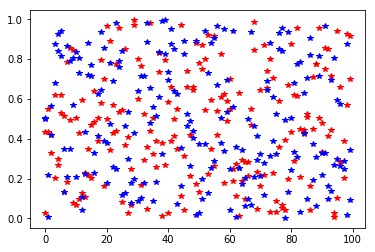

In [25]:
import matplotlib.pyplot as plt

plt.plot(A, 'r*')
plt.plot(B, 'b*')
plt.show()